In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
file = np.genfromtxt('catRawMags1305/catDir/matchedFLCpsf0906.dat',names=True)

In [3]:
psf_dir = '/Volumes/Spare Data/Hannah_Data/mattia/rephotometryquestion/'
psf = np.genfromtxt(psf_dir + 'HOROLOGIUM_CF.1.TOSEND.CAT')

In [4]:
mat_match = np.genfromtxt('pixPosHorIhannah_idmattia.dat',names=True)

In [5]:
matched = np.genfromtxt('catRawMags1305/catDir/matchedMattiaInfo.dat',names=True)

In [6]:
match_g = matched[matched['m814c']>10]

In [7]:
file_g = file[file['magPSF']>10]
file_g = file_g[file_g['c_star']>0.5]

In [8]:
magDiff = file_g['magZPT'] - file_g['magPSF']

In [9]:
print('Median:',np.median(magDiff))
print('Mean:',np.mean(magDiff))
print('St. Dev:',np.std(magDiff))
print('Num. of Sources:',len(magDiff))

Median: 0.028585735368958254
Mean: -0.01814038415966137
St. Dev: 0.3194102735991613
Num. of Sources: 990


In [10]:
magOrig = match_g['mag1'] - match_g['m814c']
print('Median:',np.median(magOrig))
print('Mean:',np.mean(magOrig))
print('St. Dev:',np.std(magOrig))
print('Num. of Sources:',len(magOrig))

Median: 0.2822500000000012
Mean: 0.27688516260162604
St. Dev: 0.2611519368735998
Num. of Sources: 1476


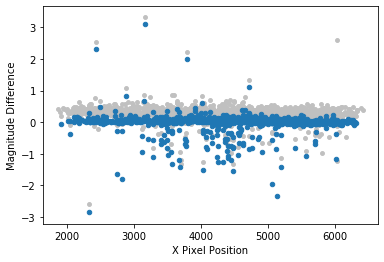

In [11]:
fig, ax = plt.subplots()

ax.scatter(match_g['xPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['xPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('X Pixel Position')

plt.show()

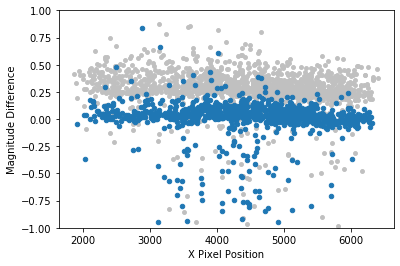

In [12]:
fig, ax = plt.subplots()

ax.scatter(match_g['xPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['xPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('X Pixel Position')

ax.set_ylim(-1,1)
plt.show()

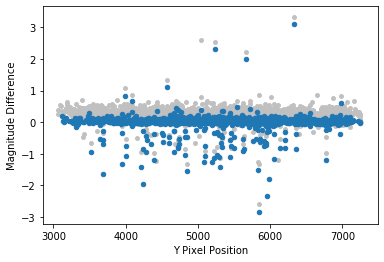

In [13]:
fig, ax = plt.subplots()

ax.scatter(match_g['yPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['yPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('Y Pixel Position')

plt.show()

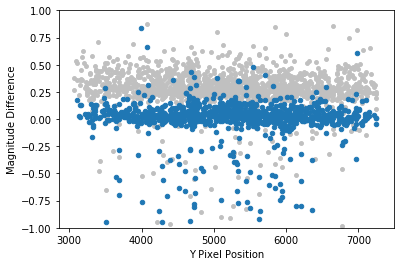

In [14]:
fig, ax = plt.subplots()

ax.scatter(match_g['yPSF'],magOrig,s=15,color='silver')
ax.scatter(file_g['yPSF_trans'],magDiff,s=20)

ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('Y Pixel Position')

ax.set_ylim(-1,1)
plt.show()

In [15]:
len(match_g)

1476

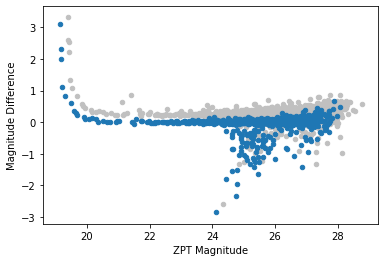

In [16]:
fig, ax = plt.subplots()

ax.scatter(match_g['mag1'],magOrig,s=20,color='silver')
ax.scatter(file_g['magZPT'],magDiff,s=20)


ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('ZPT Magnitude')

plt.show()

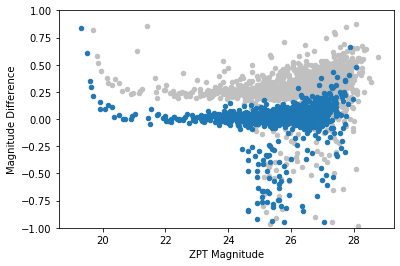

In [17]:
fig, ax = plt.subplots()

ax.scatter(match_g['mag1'],magOrig,s=20,color='silver')
ax.scatter(file_g['magZPT'],magDiff,s=20)


ax.set_ylabel('Magnitude Difference')
ax.set_xlabel('ZPT Magnitude')

ax.set_ylim(-1,1)
plt.show()

In [18]:
keep = file_g['mag1']!=file_g['mag1']
tmp_keep = np.logical_and(magDiff>=-0.1,magDiff<=0.1)
keep = np.logical_or(keep,tmp_keep)

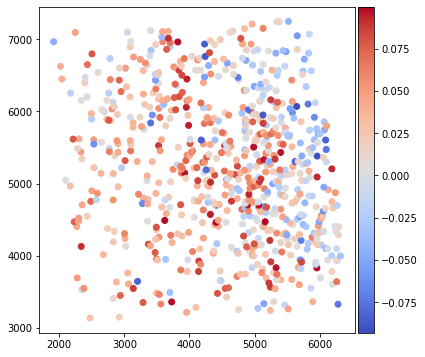

In [19]:
fig, ax = plt.subplots(figsize=(6,6))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.scatter(file_g['xPSF_trans'][keep],file_g['yPSF_trans'][keep], 
                c=magDiff[keep],cmap='coolwarm')

fig.colorbar(im, cax=cax, orientation='vertical')

# ax.scatter(file_g['xPSF_trans'][keep],file_g['yPSF_trans'][keep],c=magDiff[keep],s=20)


plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
# .reshape((-1, 1))

In [21]:
model = LinearRegression().fit(file_g['yPSF_trans'].reshape((-1,1)),magDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: -0.03496252929439575
slope: [3.22151259e-06]


In [22]:
model = LinearRegression().fit(file_g['xPSF_trans'].reshape((-1,1)),magDiff)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.027044211095760808
slope: [-1.0199126e-05]
